# ARIMA Model

**Import the libraries**

In [1]:
#Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

## Create the Random Dataset

In [5]:
#import the rendom dataset for ARIMA model:
np.random.seed(0)
n = 200
t = np.arange(n)
# Generate random data
data = 0.1 * t + np.random.randn(n)
# Make a series of dataset:
s = pd.Series(data)


**Plot the Dataset**

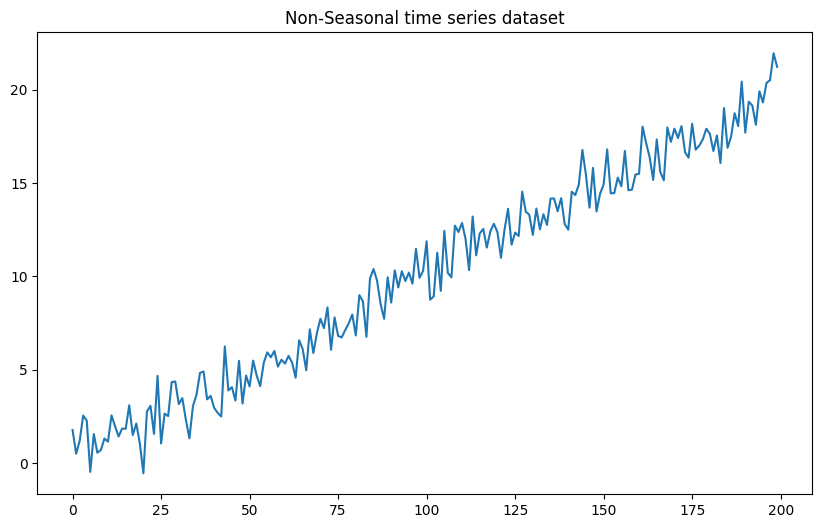

In [6]:
#Plot the data:
plt.figure(figsize=(10,6))
plt.plot(s)
plt.title('Non-Seasonal time series dataset')
plt.show()


## Apply the Seasonal Decompose Model

In [10]:
#Decompose the data :
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(s, model='additive', period=1)
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid
#Print the shape of above three:
print(f"The trend value into the dataset: \n", trend)
print(f"The seasonal value into the dataset: \n", seasonal)
print(f"The residual value into the dataset: \n", residual)


The trend value into the dataset: 
 0       1.764052
1       0.500157
2       1.178738
3       2.540893
4       2.267558
         ...    
195    19.328454
196    20.371791
197    20.523504
198    21.963236
199    21.236528
Name: trend, Length: 200, dtype: float64
The seasonal value into the dataset: 
 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: seasonal, Length: 200, dtype: float64
The residual value into the dataset: 
 0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: resid, Length: 200, dtype: float64


## Plot the Original, Trend, Seasonal and Residuals:

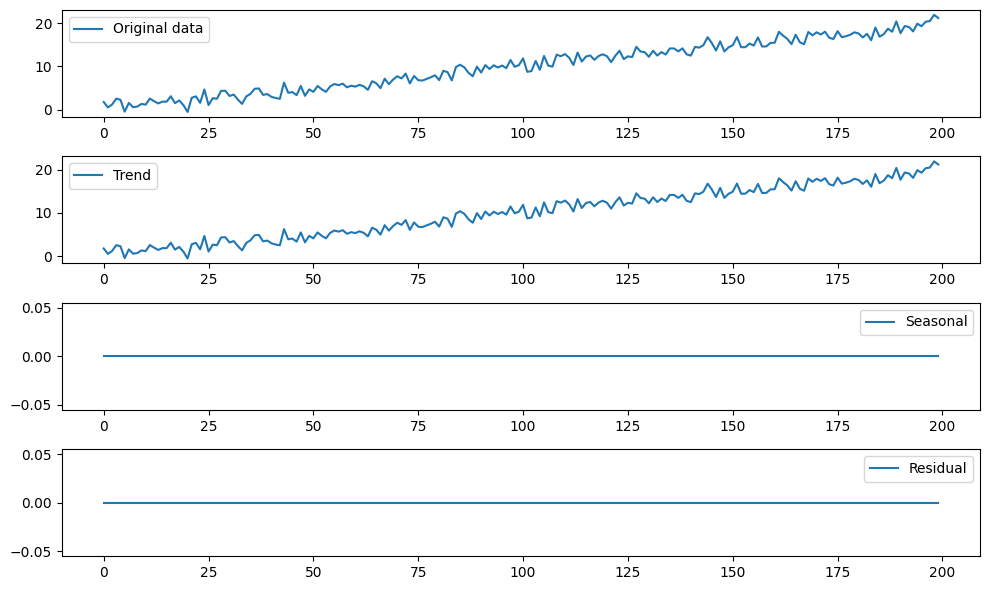

In [14]:
#Plot the the orginal data, trend , seasonility and residual into subplots:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(s, label="Original data")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend,label="Trend")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label="Seasonal")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label="Residual")
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## Apply the ARIMA Model:

In [15]:
#Fit the ARIMA model on dataset:
model = ARIMA(s, order=(1,1,0))  # order = Values of p, d, q
model_fit = model.fit()
# summarize fit of model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -318.707
Date:                Sun, 18 Aug 2024   AIC                            641.414
Time:                        23:52:56   BIC                            648.001
Sample:                             0   HQIC                           644.080
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5308      0.065     -8.192      0.000      -0.658      -0.404
sigma2         1.4384      0.156      9.205      0.000       1.132       1.745
Ljung-Box (L1) (Q):                   6.81   Jarque-

## Apply the Forecast Model

In [16]:
#Fit the forecast at the Model:
forecast = model_fit.forecast(steps=5)
print(forecast)

200    21.622241
201    21.417517
202    21.526178
203    21.468504
204    21.499115
Name: predicted_mean, dtype: float64


**Plotting the Original and Forecast data**

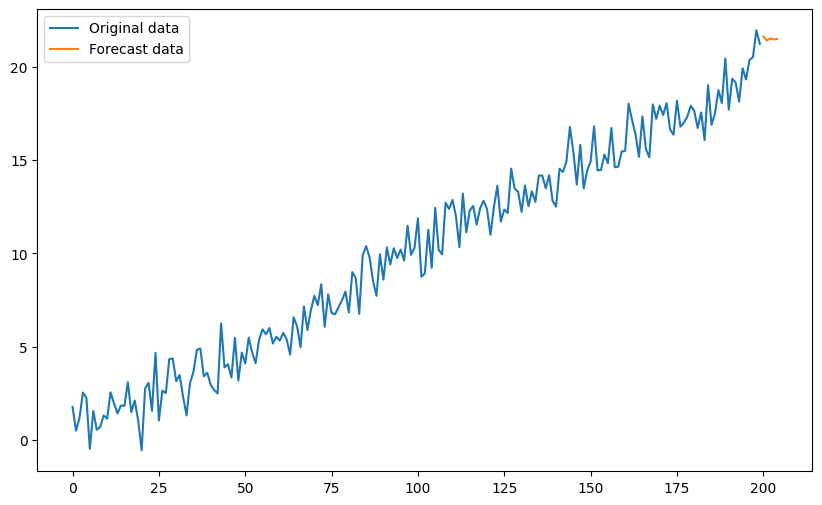

In [17]:
#Plot the figure between original data and forecast data:
plt.figure(figsize=(10,6))
plt.plot(s, label="Original data")
plt.plot(forecast, label="Forecast data")
plt.legend(loc="best")
plt.show()